In [1]:
import numpy as np
import grad
from grad import variable as vp
from grad.variable import Variable as vn

In [2]:
x = vn(1.0, requires_grad=True)
y = vn(2.0, requires_grad=True)
z = (x - y) ** 2
z.backward()
print(x.grad, y.grad)
z.backward()
print(x.grad, y.grad)

-2.0 2.0
-4.0 4.0


## Linear Regression

100%|██████████| 300/300 [00:00<00:00, 2656.89it/s]


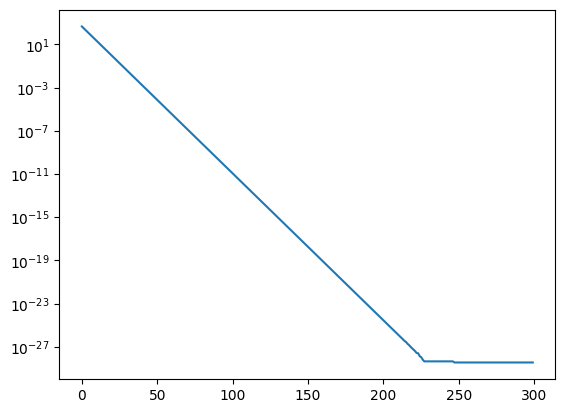

[[16.999999999999993 12.999999999999995 18.999999999999996
  22.999999999999993]]


In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
x = vn(2)
y = vn(3)
z = vn(4)
a = np.array([[x, y, z]])
W = vp.array(np.random.randn(4, 3))
Y = vp.array(np.array([17, 13, 19, 23]), requires_grad=False)
losses = []
for i in tqdm(range(300)):
    b = a @ W.T
    loss = np.mean((Y - b) ** 2)
    losses.append(loss)
    loss.backward()
    with grad.no_grad():
        W = W - 0.01 * vp.array_grad(W)
    vp.array_zero_grad(W)
plt.plot(losses)
plt.yscale('log')
plt.show()
print(a @ W.T)


## XOR Neural Net

100%|██████████| 1000/1000 [02:43<00:00,  6.10it/s]

[[-0.9999775812877372]
 [0.9999796086929053]
 [0.9999802884968344]
 [-0.9999802897844986]]


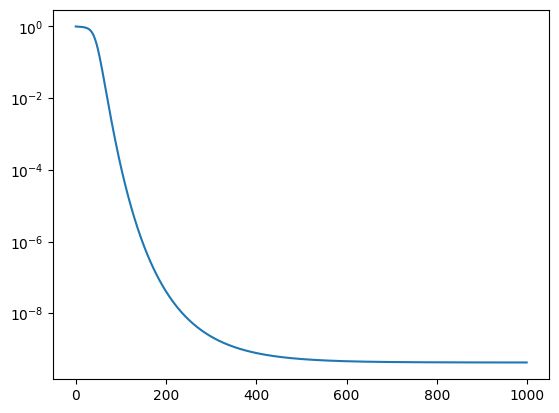

In [4]:
x = vp.array(np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]]), requires_grad=False)
y = vp.array(np.array([[-1], [1], [1], [-1]]), requires_grad=False)
W_1 = vp.array(np.random.uniform(-1./np.sqrt(2),1./np.sqrt(2),(64, 2)))
b_1 = vp.array(np.zeros(64))
W_2 = vp.array(np.random.uniform(-1./np.sqrt(64),1./np.sqrt(64),(16, 64)))
b_2 = vp.array(np.zeros(16))
W_3 = vp.array(np.random.uniform(-1./np.sqrt(16),1./np.sqrt(16),(1, 16)))
b_3 = vp.array(np.zeros(1))
losses = []
lr = 0.1
for i in tqdm(range(1000)):
    f_1 = np.tanh(x @ W_1.T + b_1)
    f_2 = np.tanh(f_1 @ W_2.T + b_2)
    z_3 = f_2 @ W_3.T + b_3
    loss = np.mean((z_3 - y) ** 2)
    losses.append(loss)
    loss.backward()
    with grad.no_grad():
        W_1 = W_1 - lr * vp.array_grad(W_1)
        b_1 = b_1 - lr * vp.array_grad(b_1)
        W_2 = W_2 - lr * vp.array_grad(W_2)
        b_2 = b_2 - lr * vp.array_grad(b_2)
        W_3 = W_3 - lr * vp.array_grad(W_3)
        b_3 = b_3 - lr * vp.array_grad(b_3)
    vp.array_zero_grad(W_1)
    vp.array_zero_grad(b_1)
    vp.array_zero_grad(W_2)
    vp.array_zero_grad(b_2)
    vp.array_zero_grad(W_3)
    vp.array_zero_grad(b_3)
    lr *= 0.99
print(z_3)
plt.plot(losses)
plt.yscale('log')